# 1. Points generator

In [1]:
from components.points_generator import PointsGenerator

# For testing you can limit the points to 50 :D
pg = PointsGenerator(n_points=100)
pg.generate_points()

In [2]:
# get each attribute:
pg.generated_points
# pg.demand_df
# pg.supply_df
# pg.magazines_points
# pg.distances

{0: {'coords': (168, 180), 'point_type': 'demand'},
 1: {'coords': (147, 127), 'point_type': 'demand'},
 2: {'coords': (119, 190), 'point_type': 'supply'},
 3: {'coords': (159, 181), 'point_type': 'supply'},
 4: {'coords': (151, 150), 'point_type': 'demand'},
 5: {'coords': (188, 178), 'point_type': 'demand'},
 6: {'coords': (107, 164), 'point_type': 'demand'},
 7: {'coords': (101, 186), 'point_type': 'demand'},
 8: {'coords': (147, 171), 'point_type': 'supply'},
 9: {'coords': (122, 122), 'point_type': 'supply'},
 10: {'coords': (134, 197), 'point_type': 'demand'},
 11: {'coords': (128, 184), 'point_type': 'supply'},
 12: {'coords': (102, 105), 'point_type': 'demand'},
 13: {'coords': (121, 188), 'point_type': 'demand'},
 14: {'coords': (128, 160), 'point_type': 'magazine'},
 15: {'coords': (178, 178), 'point_type': 'demand'},
 16: {'coords': (150, 138), 'point_type': 'magazine'},
 17: {'coords': (133, 184), 'point_type': 'supply'},
 18: {'coords': (131, 118), 'point_type': 'demand'},

# 2. VRP Algorithm

In [3]:
from components.vrp_algorithm import VRPAlgorithm
from components.ga_components import *

# Instantiate the VRPAlgorithm object with some parameters...
# Here you can also limit the iterations for testing purposes
vrp = VRPAlgorithm(population_size=20, n_iterations=100,
selector=TournamentSelector(0.35), crossover=PMXCrossover(0.85), mutator=InverseMutator(0.025))

In [4]:
# learn...
vrp.learn(pg)

Starting algorithm...
Iteration: 0.                 Result: 13576.81006216508
Iteration: 5.                 Result: 13017.046400575618                 Best result: 13017.046400575618
Iteration: 10.                 Result: 12957.958834623048                 Best result: 12957.958834623048
Iteration: 15.                 Result: 12312.846793480312                 Best result: 12300.036305844558
Iteration: 20.                 Result: 12292.289588999389                 Best result: 12238.386477821496
Iteration: 25.                 Result: 12206.57807888238                 Best result: 12206.57807888238
Iteration: 30.                 Result: 11738.825707871209                 Best result: 11738.825707871209
Iteration: 35.                 Result: 11783.39955938455                 Best result: 11738.825707871209
Iteration: 40.                 Result: 11792.887212002886                 Best result: 11738.825707871209
Iteration: 45.                 Result: 11777.422104874635                 Best

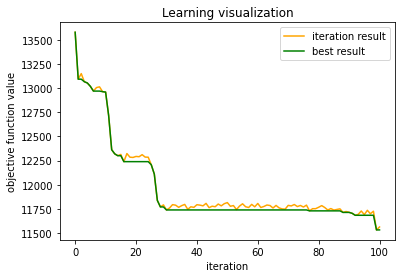

In [5]:
# Visualize the learning curves...
vrp.learning_visualization

In [6]:
# A one-row pandas df that contains dictionaries with the best routes for each product within each task
# demand_routes - we deliver there
# supply_routes - we pickup from there
# each product represent one car, so we have 6 cars in total
vrp.best_paths

,demand_routes,supply_routes
0,"{'Tuna': [16, 6, 78, 66, 49, 62, 53, 13, 10, 3...","{'Tuna': [14, 30, 8, 94, 55, 38, 9, 65, 99, 92..."


In [7]:
# EXAMPLE: how to get the route for Uran, from the supply_routes
# 0 because always only one row
vrp.best_paths['supply_routes'][0]['Uran']

[14,
 30,
 8,
 94,
 55,
 38,
 58,
 9,
 65,
 99,
 92,
 83,
 51,
 79,
 48,
 73,
 40,
 17,
 93,
 68,
 29,
 77,
 37,
 35,
 76,
 33,
 64,
 75,
 11,
 24,
 19,
 43,
 56,
 20,
 27,
 39,
 36,
 3,
 47,
 45,
 82,
 14,
 91,
 46,
 2,
 69]

In [8]:
# :)
vrp.ile_janusz_zaoszczedzil

Gdyby Janusz na łoko (na łoko to jeden umar)
            wyznaczał trasy swoich ciężarówek, to by zrobiły
            one 13576.81 km. Czyli przy łobecnych cenach dizla,
            śr. 6.50 zł i średnim spalaniu dostawczaka 13l.,
            to by wydoł 88249.27 zł na paliwo. Kurła!
Gdyby Janusz się nos posłuchoł i kupił nosz pakiet
            maszin lerningowy, to by jego ciężarówki zrobiły
            11532.33 km, czyli o 2044.48 km
            mniej! Janusz by załoszczędził
            13289.14 zł! Kurła!
